In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
from keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report, precision_score, recall_score, f1_score
from tensorflow.keras import regularizers

In [ ]:
def plot_hist(hist):
    plt.figure(figsize=(20,20))
    fig, axs = plt.subplots(2)
    
    axs[0].plot(hist.history["accuracy"], label="Train accuracy")
    axs[0].plot(hist.history["val_accuracy"], label="Test accuracy")    
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    axs[1].plot(hist.history["loss"], label="Train error")
    axs[1].plot(hist.history["val_loss"], label="Test error")    
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.tight_layout()
    plt.show()

In [ ]:
def prepare_dataset(test_size, validation_size):
    inputs_ = np.loadtxt("/content/drive/MyDrive/inputs_mfcc.txt")
    X = inputs_.reshape(inputs_.shape[0], inputs_.shape[1] // 13, 13)
    y = np.loadtxt("/content/drive/MyDrive/targets_mfcc.txt")
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = validation_size)
    X_train = X_train[..., np.newaxis]
    X_val = X_val[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_val, X_test, y_train, y_val, y_test

In [ ]:
genres = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]

def plot_cf_matrix(cf_matrix, title):
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
    ax.set_title(title);
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ax.xaxis.set_ticklabels(genres, rotation=90)
    ax.yaxis.set_ticklabels(genres, rotation=0)
    plt.show()

Load data

In [ ]:
targets = np.loadtxt("/content/drive/MyDrive/targets_mfcc.txt")

In [ ]:
inputs_ = np.loadtxt("/content/drive/MyDrive/inputs_mfcc.txt")
inputs = inputs_.reshape(inputs_.shape[0], inputs_.shape[1] // 13, 13)

In [ ]:
input_train, input_test, target_train, target_test = train_test_split(inputs, targets, test_size=0.3)
print(input_train.shape, target_train.shape)

(6990, 130, 13) (6990,)


# ANN

In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(inputs.shape[1],inputs.shape[2])))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 1690)              0         
                                                                 
 dense_18 (Dense)            (None, 512)               865792    
                                                                 
 dense_19 (Dense)            (None, 256)               131328    
                                                                 
 dense_20 (Dense)            (None, 64)                16448     
                                                                 
 dense_21 (Dense)            (None, 10)                650       
                                                                 
Total params: 1,014,218
Trainable params: 1,014,218
Non-trainable params: 0
_________________________________________________________________


In [ ]:
adam = optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=adam,
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [ ]:
model.compile(optimizer=adam,
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

hist = model.fit(input_train, target_train,
                 validation_data = (input_test,target_test),
                 epochs = 50,
                 batch_size = 32)

Epoch 1/50
219/219 [==============================] - 2s 6ms/step - loss: 9.0299 - accuracy: 0.3185 - val_loss: 4.7095 - val_accuracy: 0.3538
Epoch 2/50
219/219 [==============================] - 1s 5ms/step - loss: 3.3842 - accuracy: 0.4319 - val_loss: 3.4917 - val_accuracy: 0.3802
Epoch 3/50
219/219 [==============================] - 1s 5ms/step - loss: 2.4364 - accuracy: 0.4921 - val_loss: 2.9098 - val_accuracy: 0.4172
Epoch 4/50
219/219 [==============================] - 1s 5ms/step - loss: 1.8481 - accuracy: 0.5495 - val_loss: 2.6672 - val_accuracy: 0.4496
Epoch 5/50
219/219 [==============================] - 1s 5ms/step - loss: 1.5217 - accuracy: 0.6011 - val_loss: 2.5633 - val_accuracy: 0.4496
Epoch 6/50
219/219 [==============================] - 1s 5ms/step - loss: 1.2328 - accuracy: 0.6536 - val_loss: 2.3235 - val_accuracy: 0.4937
Epoch 7/50
219/219 [==============================] - 1s 6ms/step - loss: 0.9946 - accuracy: 0.7000 - val_loss: 2.3789 - val_accuracy: 0.4823
Epoch 

<Figure size 1440x1440 with 0 Axes>

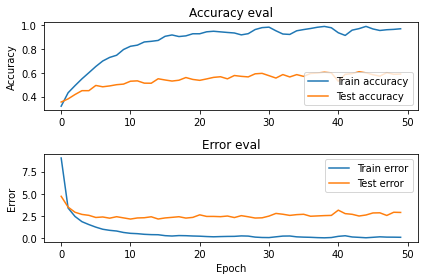

In [ ]:
plot_hist(hist)

In [ ]:
test_error, test_accuracy = model.evaluate(input_test, target_test, verbose=1)
print(f"Test accuracy: {test_accuracy}")

94/94 [==============================] - 0s 3ms/step - loss: 2.8903 - accuracy: 0.5898
Test accuracy: 0.5897864103317261


In [ ]:
train_error, train_accuracy = model.evaluate(input_train, target_train, verbose=1)
print(f"Train accuracy: {train_accuracy}")

219/219 [==============================] - 1s 3ms/step - loss: 0.1410 - accuracy: 0.9562
Train accuracy: 0.95622318983078


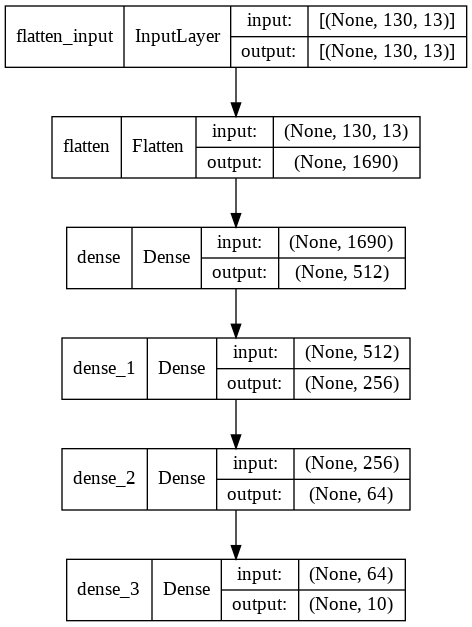

In [ ]:
keras.utils.plot_model(model, to_file="my_model.png", show_shapes=True)

## Overfitting

This part deals with the overfitting of the previous model. We can deal with it by majorly doing the following process.

Making architecture less complicated
- Using augmented data
- Early stopping of training
- Adding dropout layers
- Regularization / Standardization

I have added the dropout layers and kernel_regularizers as compared to previous naive model giving the dropout probability as 30% Kernel_regularizers is one of the 3 type of regularizer used to impose penalties. More info can be found [here](https://medium.com/@robertjohn_15390/regularization-in-tensorflow-using-keras-api-48aba746ae21).

In [ ]:
# Overfitting
model = Sequential()

model.add(Flatten(input_shape=(inputs.shape[1],inputs.shape[2])))
model.add(Dense(512, activation='relu', kernel_regularizer = keras.regularizers.l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu', kernel_regularizer = keras.regularizers.l2(0.003)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer = keras.regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 1690)              0         
                                                                 
 dense_27 (Dense)            (None, 512)               865792    
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_28 (Dense)            (None, 256)               131328    
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_29 (Dense)            (None, 64)                16448     
                                                                 
 dropout_12 (Dropout)        (None, 64)               

In [ ]:
adam = optimizers.Adam(learning_rate=1e-4)

model.compile(optimizer=adam,
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

hist = model.fit(input_train, target_train,
                 validation_data = (input_test,target_test),
                 epochs = 50,
                 batch_size = 32)

Epoch 1/50
219/219 [==============================] - 4s 10ms/step - loss: 18.6073 - accuracy: 0.1329 - val_loss: 5.0006 - val_accuracy: 0.2433
Epoch 2/50
219/219 [==============================] - 2s 9ms/step - loss: 7.5258 - accuracy: 0.1737 - val_loss: 4.8417 - val_accuracy: 0.2430
Epoch 3/50
219/219 [==============================] - 3s 11ms/step - loss: 5.9342 - accuracy: 0.1838 - val_loss: 4.8507 - val_accuracy: 0.2290
Epoch 4/50
219/219 [==============================] - 1s 6ms/step - loss: 5.4035 - accuracy: 0.1957 - val_loss: 4.8246 - val_accuracy: 0.2924
Epoch 5/50
219/219 [==============================] - 1s 6ms/step - loss: 5.1816 - accuracy: 0.2152 - val_loss: 4.7309 - val_accuracy: 0.3037
Epoch 6/50
219/219 [==============================] - 1s 6ms/step - loss: 4.9872 - accuracy: 0.2379 - val_loss: 4.6413 - val_accuracy: 0.2971
Epoch 7/50
219/219 [==============================] - 1s 6ms/step - loss: 4.9001 - accuracy: 0.2436 - val_loss: 4.5647 - val_accuracy: 0.3264
Epo

<Figure size 1440x1440 with 0 Axes>

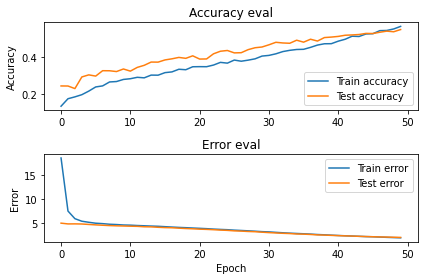

In [ ]:
plot_hist(hist)

In [ ]:
test_error, test_accuracy = model.evaluate(input_test, target_test, verbose=1)
print(f"Test accuracy: {test_accuracy}")

94/94 [==============================] - 0s 3ms/step - loss: 2.0238 - accuracy: 0.5507
Test accuracy: 0.5507343411445618


In [ ]:
train_error, train_accuracy = model.evaluate(input_train, target_train, verbose=1)
print(f"Train accuracy: {train_accuracy}")

219/219 [==============================] - 1s 3ms/step - loss: 1.6879 - accuracy: 0.6805
Train accuracy: 0.6805436611175537


In [ ]:
y_pred=model.predict(input_test)
y_pred_labels = np.argmax(y_pred, axis=1)

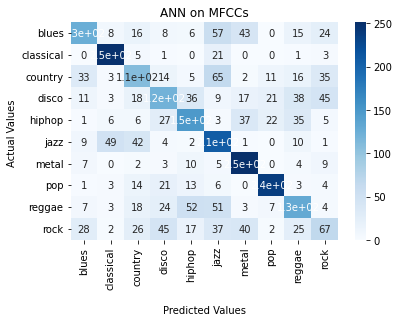

CA: 0.551; Precision: 0.541; Recall: 0.552; F1-score: 0.540


In [ ]:
cf_matrix = confusion_matrix(target_test, y_pred_labels)
plot_cf_matrix(cf_matrix, "ANN on MFCCs")

ca = accuracy_score(target_test, y_pred_labels)
p = precision_score(target_test, y_pred_labels, average=None)
r = recall_score(target_test, y_pred_labels, average=None)
f1 = f1_score(target_test, y_pred_labels, average=None)

print("CA: %.3f; Precision: %.3f; Recall: %.3f; F1-score: %.3f" % (ca, np.mean(p), np.mean(r), np.mean(f1)))

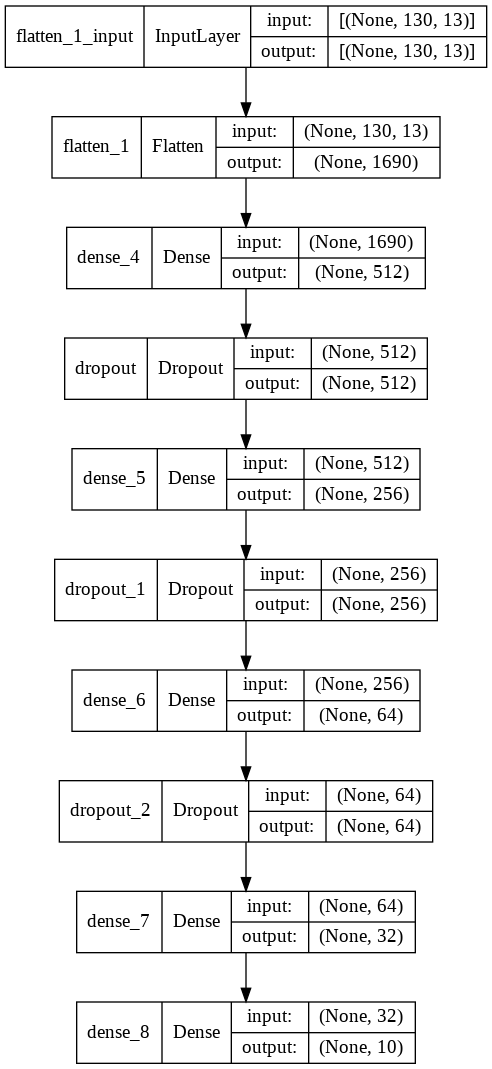

In [ ]:
keras.utils.plot_model(model, to_file="my_model.png", show_shapes=True)

# CNN (on MFCC)

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test = prepare_dataset(0.25, 0.2)
input_shape = (X_train.shape[1],X_train.shape[2],X_train.shape[3])
print(input_shape)

(130, 13, 1)


In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation = "relu", input_shape = input_shape))
model.add(MaxPool2D((3, 3), strides=(2, 2), padding="same"))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), activation = "relu"))
model.add(MaxPool2D((3, 3), strides=(2, 2), padding="same"))
model.add(BatchNormalization())

model.add(Conv2D(32, (2, 2), activation = "relu"))
model.add(MaxPool2D((2, 2), strides=(2, 2), padding="same"))
model.add(BatchNormalization())

model.add(Conv2D(16, (1, 1), activation = "relu"))
model.add(MaxPool2D((1, 1), strides=(2, 2), padding="same"))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 128, 11, 64)       640       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 6, 64)        0         
 2D)                                                             
                                                                 
 batch_normalization_5 (Batc  (None, 64, 6, 64)        256       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 62, 4, 32)         18464     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 2, 32)        0         
 2D)                                                             
                                                      

In [ ]:
adam = optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=adam,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

hist = model.fit(X_train, y_train,
                 validation_data = (X_test,y_test),
                 epochs = 50,
                 batch_size = 32)

Epoch 1/50
188/188 [==============================] - 4s 15ms/step - loss: 2.4835 - accuracy: 0.1946 - val_loss: 2.0219 - val_accuracy: 0.2952
Epoch 2/50
188/188 [==============================] - 3s 15ms/step - loss: 2.0700 - accuracy: 0.2949 - val_loss: 1.7970 - val_accuracy: 0.3781
Epoch 3/50
188/188 [==============================] - 2s 11ms/step - loss: 1.8339 - accuracy: 0.3574 - val_loss: 1.6597 - val_accuracy: 0.4249
Epoch 4/50
188/188 [==============================] - 2s 13ms/step - loss: 1.7148 - accuracy: 0.4078 - val_loss: 1.5399 - val_accuracy: 0.4606
Epoch 5/50
188/188 [==============================] - 2s 13ms/step - loss: 1.6184 - accuracy: 0.4295 - val_loss: 1.4515 - val_accuracy: 0.5010
Epoch 6/50
188/188 [==============================] - 3s 17ms/step - loss: 1.5306 - accuracy: 0.4604 - val_loss: 1.4129 - val_accuracy: 0.5134
Epoch 7/50
188/188 [==============================] - 3s 17ms/step - loss: 1.4625 - accuracy: 0.4849 - val_loss: 1.3288 - val_accuracy: 0.5406

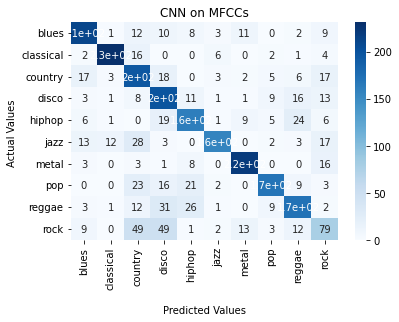

CA: 0.720; Precision: 0.730; Recall: 0.714; F1-score: 0.716


In [ ]:
y_pred=model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

cf_matrix = confusion_matrix(y_test, y_pred_labels)
plot_cf_matrix(cf_matrix, "CNN on MFCCs")

ca = accuracy_score(y_test, y_pred_labels)
p = precision_score(y_test, y_pred_labels, average=None)
r = recall_score(y_test, y_pred_labels, average=None)
f1 = f1_score(y_test, y_pred_labels, average=None)

print("CA: %.3f; Precision: %.3f; Recall: %.3f; F1-score: %.3f" % (ca, np.mean(p), np.mean(r), np.mean(f1)))

<Figure size 1440x1440 with 0 Axes>

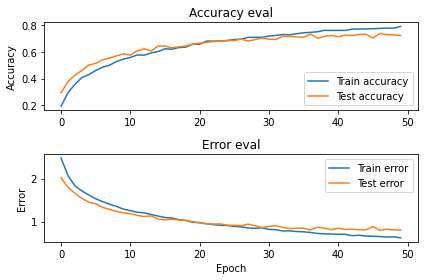

In [ ]:
plot_hist(hist)

In [ ]:
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test accuracy: {test_accuracy}")

79/79 [==============================] - 0s 5ms/step - loss: 0.8609 - accuracy: 0.7193
Test accuracy: 0.7192631363868713


In [ ]:
train_error, train_accuracy = model.evaluate(input_train, target_train, verbose=1)
print(f"Train accuracy: {train_accuracy}")

219/219 [==============================] - 3s 12ms/step - loss: 0.6174 - accuracy: 0.7953
Train accuracy: 0.7952789664268494


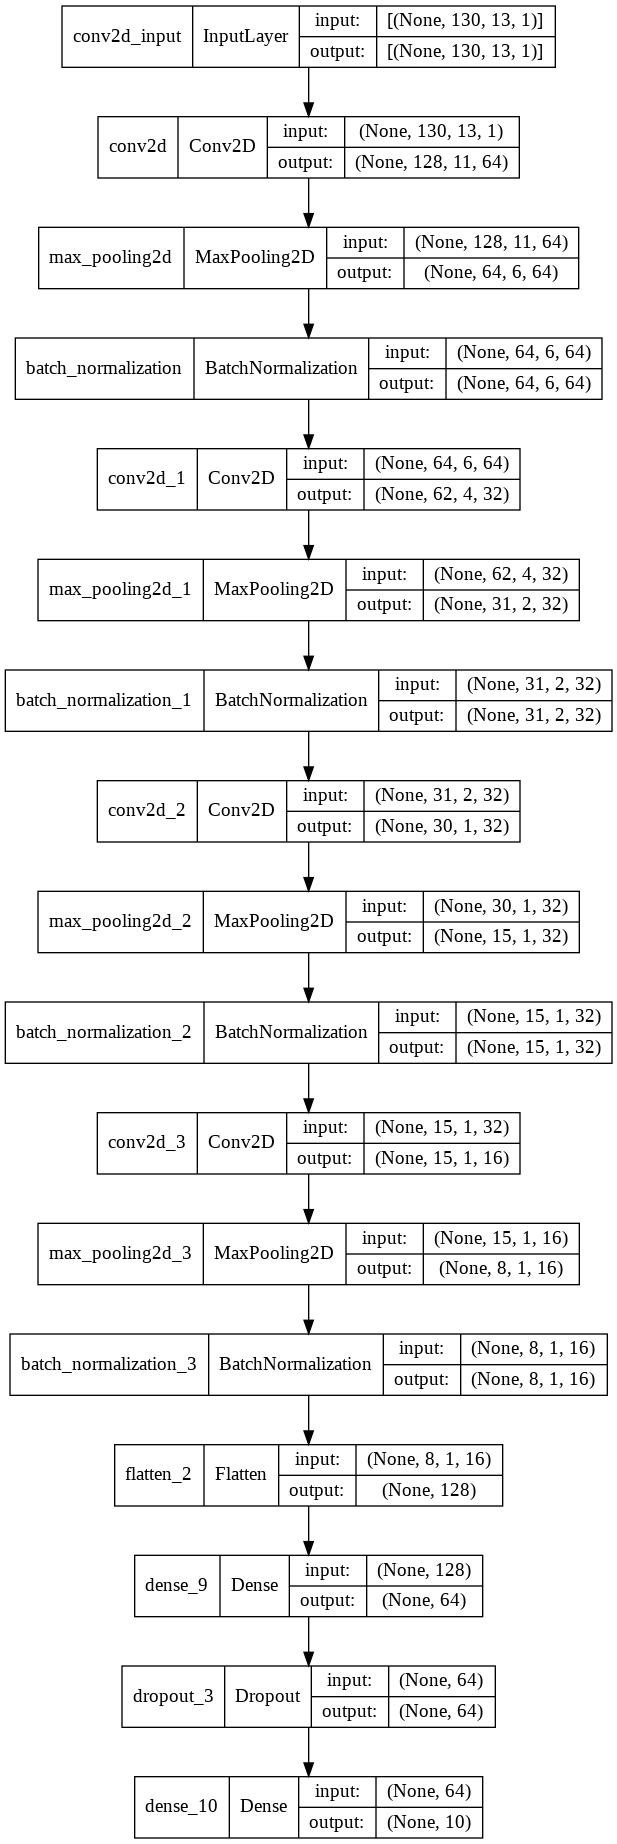

In [ ]:
keras.utils.plot_model(model, to_file="my_model.png", show_shapes=True)

# CNN (on MEL-spectrograms)

In [ ]:
train_dir = "/content/drive/MyDrive/spectrograms3sec/train/"
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(288,432),color_mode="rgba",class_mode='categorical',batch_size=128)

validation_dir = "/content/drive/MyDrive/spectrograms3sec/test/"
vali_datagen = ImageDataGenerator(rescale=1./255)
vali_generator = vali_datagen.flow_from_directory(validation_dir,target_size=(288,432),color_mode='rgba',class_mode='categorical',batch_size=128)

Found 8999 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [ ]:
model = Sequential([
    # The first convolution
    Conv2D(8, kernel_size=(3,3), strides=(1,1), activation="relu", input_shape=(288,432,4), kernel_regularizer=regularizers.l2(l=0.001)),
    BatchNormalization(axis=3),
    MaxPooling2D(2, 2),
    # The second convolution
    Conv2D(16, kernel_size=(3,3), strides=(1,1), activation='relu', kernel_regularizer=regularizers.l2(l=0.001)),
    BatchNormalization(axis=3),
    MaxPooling2D(2,2),    # The third convolution
    Conv2D(32, kernel_size=(3,3), strides=(1,1), activation='relu', kernel_regularizer=regularizers.l2(l=0.001)),
    BatchNormalization(axis=3),
    MaxPooling2D(2,2),
    # The fourth convolution
    Conv2D(64, kernel_size=(3,3), strides=(1,1), activation='relu', kernel_regularizer=regularizers.l2(l=0.001)),
    BatchNormalization(axis=-1),
    MaxPooling2D(2,2),
    # The fifth convolution
    Conv2D(128, kernel_size=(3,3), strides=(1,1), activation='relu', kernel_regularizer=regularizers.l2(l=0.001)),
    BatchNormalization(axis=-1),
    MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    Flatten(),
    # Dropout
    Dropout(rate=0.3),
    # Dense
    Dense(10, activation='softmax', name='fc10')
])

In [ ]:
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0005),
              metrics=['accuracy'])

In [ ]:
hist = model.fit(train_generator,
                 validation_data = vali_generator,
                 epochs = 50)

Epoch 1/50
71/71 [==============================] - 93s 1s/step - loss: 2.9248 - accuracy: 0.3026 - val_loss: 4.2142 - val_accuracy: 0.1000
Epoch 2/50
71/71 [==============================] - 90s 1s/step - loss: 1.7081 - accuracy: 0.4949 - val_loss: 8.2560 - val_accuracy: 0.1000
Epoch 3/50
71/71 [==============================] - 91s 1s/step - loss: 1.4575 - accuracy: 0.5826 - val_loss: 9.9635 - val_accuracy: 0.1000
Epoch 4/50
71/71 [==============================] - 92s 1s/step - loss: 1.2847 - accuracy: 0.6401 - val_loss: 9.5882 - val_accuracy: 0.1010
Epoch 5/50
71/71 [==============================] - 90s 1s/step - loss: 1.0908 - accuracy: 0.6923 - val_loss: 7.1540 - val_accuracy: 0.1440
Epoch 6/50
71/71 [==============================] - 91s 1s/step - loss: 0.9693 - accuracy: 0.7320 - val_loss: 3.9622 - val_accuracy: 0.3310
Epoch 7/50
71/71 [==============================] - 91s 1s/step - loss: 0.9036 - accuracy: 0.7500 - val_loss: 2.4130 - val_accuracy: 0.4560
Epoch 8/50
71/71 [==

<Figure size 1440x1440 with 0 Axes>

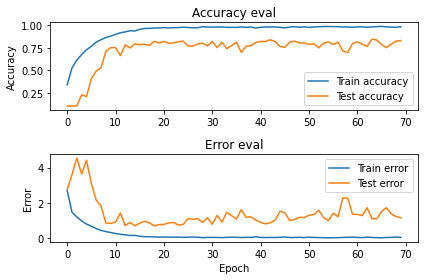

In [ ]:
plot_hist(hist)